In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [14]:
def gibbs_sampling(mus, sigmas, iter=10000):
    samples = np.zeros((iter, 2))
    y = np.random.rand() * 10
    sigmax = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    sigmay = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    for i in range(iter):
        mux = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
        x = np.random.normal(mux, sigmax)
        muy = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
        y = np.random.normal(muy, sigmay)
        samples[i, :] = [x, y]
        if i%1000 == 0:
            print(i)
    return samples, sigmax, sigmay

In [15]:
mus = np.array([5, 10])
sigmas = np.array([[3, 2], [1, 2]])

samples, sigmax, sigmay = gibbs_sampling(mus, sigmas)
x = samples[:,0]
y = samples[:,1]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


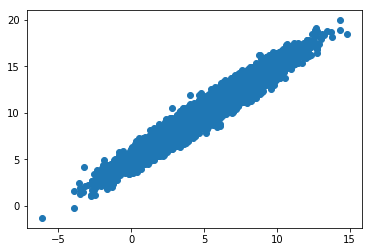

In [12]:
plt.plot(x, y, 'o')

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """Entry point for launching an IPython kernel.


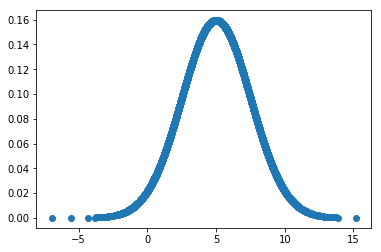

In [21]:
plt.plot(x,mlab.normpdf(x, mus[0], sigmax), "o")
plt.show()

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """Entry point for launching an IPython kernel.


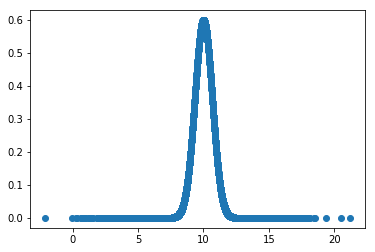

In [23]:
plt.plot(y,mlab.normpdf(y, mus[1], sigmay), "o")
plt.show()